Keras  classifier for regression problem follow all best practices like normalization etc

# **Image Classifier** 
MNIST dataset

In [9]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
#Loading the MNIST dataset

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

11501568/11490434 [==============================] - 0s 0us/step


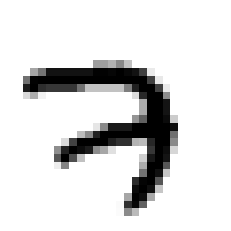

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
# Defining the Keras model

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax"),                                 
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


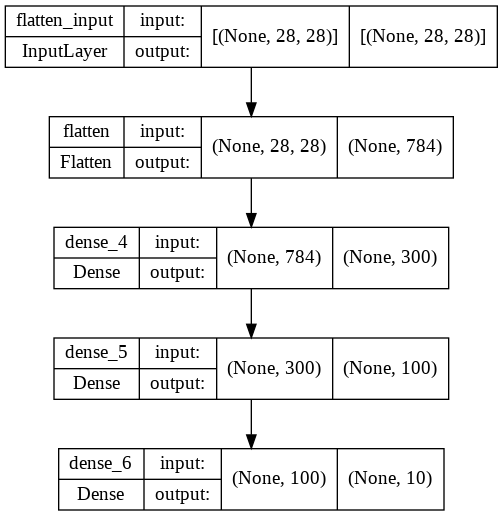

In [13]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]) #using default adam optimizer
model.evaluate(X_test, y_test)
history = model.fit(X_train, y_train, epochs=20
                    ,validation_data=(X_valid, y_valid))

313/313 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.9728
Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0683 - accuracy: 0.9810 - val_loss: 0.0865 - val_accuracy: 0.9758
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9860 - val_loss: 0.0957 - val_accuracy: 0.9744
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9887 - val_loss: 0.0762 - val_accuracy: 0.9822
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0370 - accuracy: 0.9905 - val_loss: 0.0995 - val_accuracy: 0.9782
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 0.1137 - val_accuracy: 0.9754
Epoch 6/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0264 - accuracy: 0.9932 - val_loss: 0.1083 - val_accuracy: 0.9838
Epoch 7/20
1719/1719 [=========================

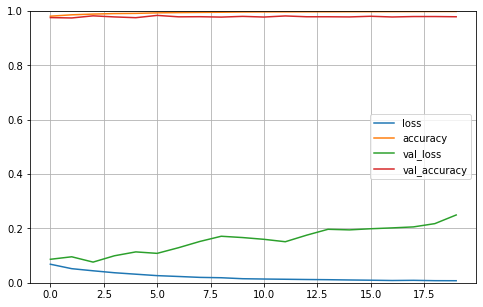

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
probablity = model.predict(X_test[:1])
print(probablity)
print("Correct Result:",y_test[0])

[[0.0000000e+00 3.4716737e-37 2.1886786e-31 1.2186001e-33 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]
Correct Result: 7


#**Regression** **MLP**

Dataset: California Housing
 

First, we will split and scale(normalize) the data using Standard Scaler

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
#Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [28]:
np.random.seed(102)
tf.random.set_seed(102)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 3.0182 - val_loss: 1.5754
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7990 - val_loss: 0.6497
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6116 - val_loss: 0.5515
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5761 - val_loss: 0.5327
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5534 - val_loss: 0.5214
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5350 - val_loss: 0.5014
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5194 - val_loss: 0.4806
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5058 - val_loss: 0.4698
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4944 - val_loss: 0.4562
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4843 - val_lo

0.3721542954444885

In [31]:
probablity = model.predict(X_test[:1])
print(probablity)
print("Correct Result:",y_test[0])

[[0.76596916]]
Correct Result: 0.477


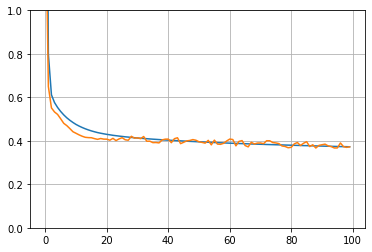

In [32]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()